In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [17]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']


In [18]:
data = df[numerical_columns].fillna(df[numerical_columns].mean()).values

In [19]:
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [20]:
def kmeans(data, k, max_iters=100):
    centroids = data[np.random.choice(len(data), size=k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])
    
    return centroids, clusters


In [21]:
def find_optimal_clusters(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        distortions.append(np.sum(np.min(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)))
    return distortions


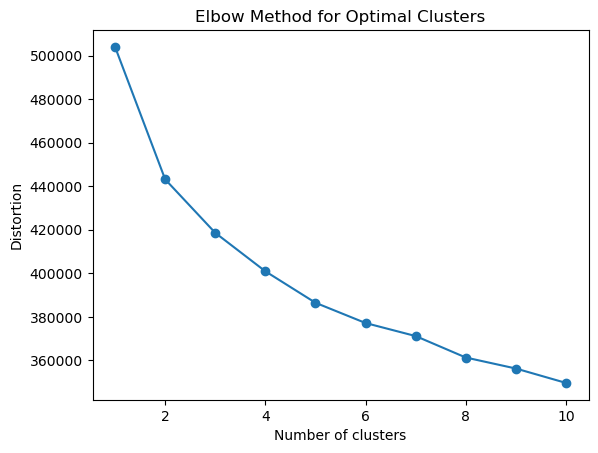

In [22]:
distortions = find_optimal_clusters(normalized_data)
plt.plot(range(1, len(distortions) + 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [23]:
optimal_k = 5

In [24]:
centroids, clusters = kmeans(normalized_data, optimal_k)

In [25]:
print("Centers:")
print(centroids)

Centers:
[[ 9.69497217e-01  5.71427526e-01  2.36481124e-02  1.11282158e-01
  -2.55012633e-01 -1.29499382e-02  2.23657535e-01  4.35656458e-01
  -4.39517428e-01 -4.34048300e-01  4.66470989e-01  3.81668411e-01
   8.02839690e-01  5.08117196e-01]
 [-2.39356380e-01 -8.11733616e-01  8.49310488e-01 -3.45599541e-01
  -8.09676891e-01  9.45245301e-01  5.78846954e-01  8.67790674e-01
  -9.47958707e-01 -7.88737587e-01  6.71537449e-01  7.08407512e-01
  -5.27261171e-01 -8.67397352e-01]
 [-3.71556000e-01 -4.28303766e-02 -2.16013328e-01 -1.10717499e-01
   4.46792599e-01 -1.49931443e-01 -3.95758755e-01 -5.13785065e-01
   3.73485229e-01  3.31910677e-01 -5.17542309e-01 -5.25094051e-01
  -1.81464399e-01 -5.54063477e-04]
 [ 8.85705077e-01  1.42907456e+00 -2.44546383e-01  1.05991004e+00
   8.40180887e-01  3.16710334e-01 -1.19068292e+00 -1.12266768e+00
  -5.52185760e-01 -6.86976408e-01 -7.34870754e-01 -6.58675414e-01
   1.20032984e+00  1.43720724e+00]
 [-9.42658818e-01 -9.83025282e-01 -1.17828242e-01 -5.000133

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

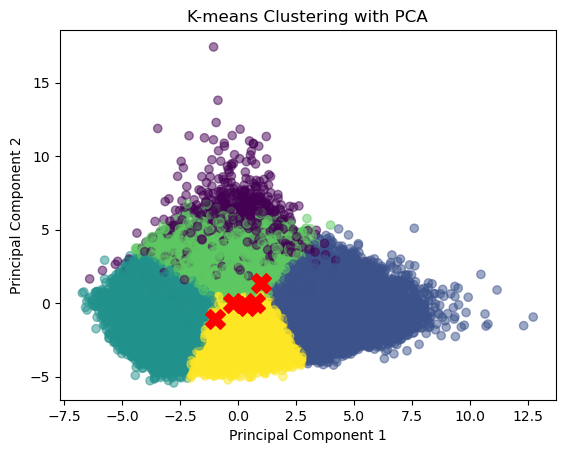

In [55]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()